In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-prices-dataset/laptopPrice.csv


In [2]:
df=pd.read_csv('/kaggle/input/laptop-prices-dataset/laptopPrice.csv')

In [3]:
df.shape

(823, 19)

In [4]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
new_df=df[['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','graphic_card_gb','Touchscreen','msoffice','rating','Price']]

In [6]:
new_df.shape

(823, 14)

In [7]:
new_df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,Touchscreen,msoffice,rating,Price
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,No,No,2 stars,34649
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,No,No,3 stars,38999
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0 GB,No,No,3 stars,39999
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,2 GB,No,No,3 stars,69990
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,0 GB,No,No,3 stars,26990


In [8]:
new_df.tail()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,Touchscreen,msoffice,rating,Price
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,0 GB,No,No,3 stars,135990
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,0 GB,No,No,3 stars,144990
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,4 GB,No,No,3 stars,149990
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,4 GB,No,No,3 stars,142990
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,0 GB,No,No,4 stars,57490


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    object
 4   ram_gb           823 non-null    object
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    object
 7   hdd              823 non-null    object
 8   os               823 non-null    object
 9   graphic_card_gb  823 non-null    object
 10  Touchscreen      823 non-null    object
 11  msoffice         823 non-null    object
 12  rating           823 non-null    object
 13  Price            823 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 90.1+ KB


## **Data Preparation**
1. Data Cleaning 
2. Data Exporation
3. Data Splitting
4. Feature Engineering
5. Model Training
6. Improve Model

**1. Data Cleaning**

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    object
 4   ram_gb           823 non-null    object
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    object
 7   hdd              823 non-null    object
 8   os               823 non-null    object
 9   graphic_card_gb  823 non-null    object
 10  Touchscreen      823 non-null    object
 11  msoffice         823 non-null    object
 12  rating           823 non-null    object
 13  Price            823 non-null    int64 
dtypes: int64(1), object(13)
memory usage: 90.1+ KB


In [11]:
new_df.isnull().sum()

brand              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
graphic_card_gb    0
Touchscreen        0
msoffice           0
rating             0
Price              0
dtype: int64

In [12]:
new_df['ram_gb'].unique()

array(['4 GB', '8 GB', '16 GB', '32 GB'], dtype=object)

In [13]:
new_df['ram_gb']=new_df['ram_gb'].str.replace('GB', '').astype('int')

/tmp/ipykernel_20/532424653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ram_gb']=new_df['ram_gb'].str.replace('GB', '').astype('int')


In [14]:
new_df['ssd']=new_df['ssd'].str.replace('GB','').astype('int')

/tmp/ipykernel_20/31623123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ssd']=new_df['ssd'].str.replace('GB','').astype('int')


In [15]:
new_df['hdd']=new_df['hdd'].str.replace('GB','').astype('int')

/tmp/ipykernel_20/2619454353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['hdd']=new_df['hdd'].str.replace('GB','').astype('int')


In [16]:
new_df['graphic_card_gb']=new_df['graphic_card_gb'].str.replace('GB','').astype('int')

/tmp/ipykernel_20/2947586306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['graphic_card_gb']=new_df['graphic_card_gb'].str.replace('GB','').astype('int')


In [17]:
new_df['rating']=new_df['rating'].str.replace('stars' and 'star','')

/tmp/ipykernel_20/2254129272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['rating']=new_df['rating'].str.replace('stars' and 'star','')


In [18]:
new_df['rating']=new_df['rating'].str.replace('s','').astype('int')

/tmp/ipykernel_20/3538702240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['rating']=new_df['rating'].str.replace('s','').astype('int')


In [19]:
new_df['processor_gnrtn'].unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th',
       '12th'], dtype=object)

In [20]:
new_df['processor_gnrtn'].mode()

0    11th
Name: processor_gnrtn, dtype: object

In [21]:
new_df['processor_gnrtn']=new_df['processor_gnrtn'].str.replace('Not Available','11th')

/tmp/ipykernel_20/1217552238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['processor_gnrtn']=new_df['processor_gnrtn'].str.replace('Not Available','11th')


In [22]:
new_df['processor_gnrtn'].unique()

array(['10th', '11th', '7th', '8th', '9th', '4th', '12th'], dtype=object)

In [23]:
new_df['processor_gnrtn']=new_df['processor_gnrtn'].str.replace('th','').astype('int')

/tmp/ipykernel_20/362737651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['processor_gnrtn']=new_df['processor_gnrtn'].str.replace('th','').astype('int')


In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    int64 
 4   ram_gb           823 non-null    int64 
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    int64 
 7   hdd              823 non-null    int64 
 8   os               823 non-null    object
 9   graphic_card_gb  823 non-null    int64 
 10  Touchscreen      823 non-null    object
 11  msoffice         823 non-null    object
 12  rating           823 non-null    int64 
 13  Price            823 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 90.1+ KB


In [25]:
new_df.describe()

,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,rating,Price
count,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,10.539490,8.680437,452.121507,227.071689,1.190765,3.562576,76745.177400
std,0.867406,4.372408,316.662592,413.105282,2.026902,0.567282,45101.790525
min,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,16990.000000
25%,10.000000,4.000000,256.000000,0.000000,0.000000,3.000000,46095.000000
50%,11.000000,8.000000,512.000000,0.000000,0.000000,4.000000,64990.000000
75%,11.000000,8.000000,512.000000,0.000000,2.000000,4.000000,89636.000000
max,12.000000,32.000000,3072.000000,2048.000000,8.000000,5.000000,441990.000000


**2. Data Exploration**

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
num_var=[]
cat_var=[]
for i in new_df:
    if new_df[i].dtype=='int64' or new_df[i].dtype=='float64':
        num_var.append(i)
    else:
        cat_var.append(i)

In [28]:
cat_var,num_var

(['brand',
  'processor_brand',
  'processor_name',
  'ram_type',
  'os',
  'Touchscreen',
  'msoffice'],
 ['processor_gnrtn',
  'ram_gb',
  'ssd',
  'hdd',
  'graphic_card_gb',
  'rating',
  'Price'])

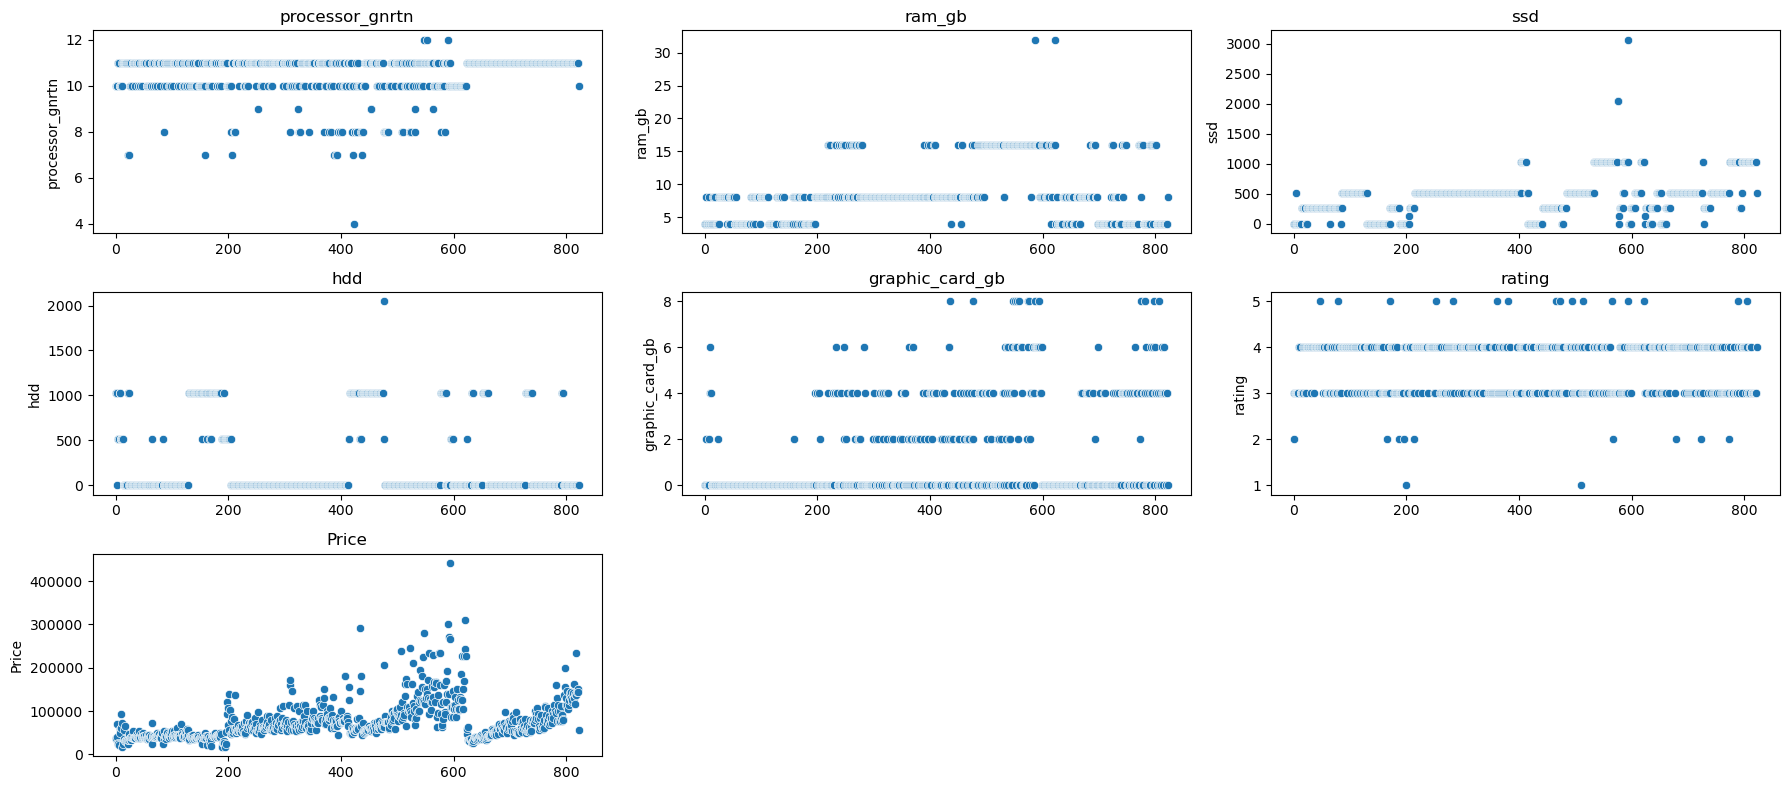

In [29]:
plt.figure(figsize=(18,8))

for i,var in enumerate(new_df[num_var]):
    plt.subplot(3,3,i+1)
    sns.scatterplot(new_df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

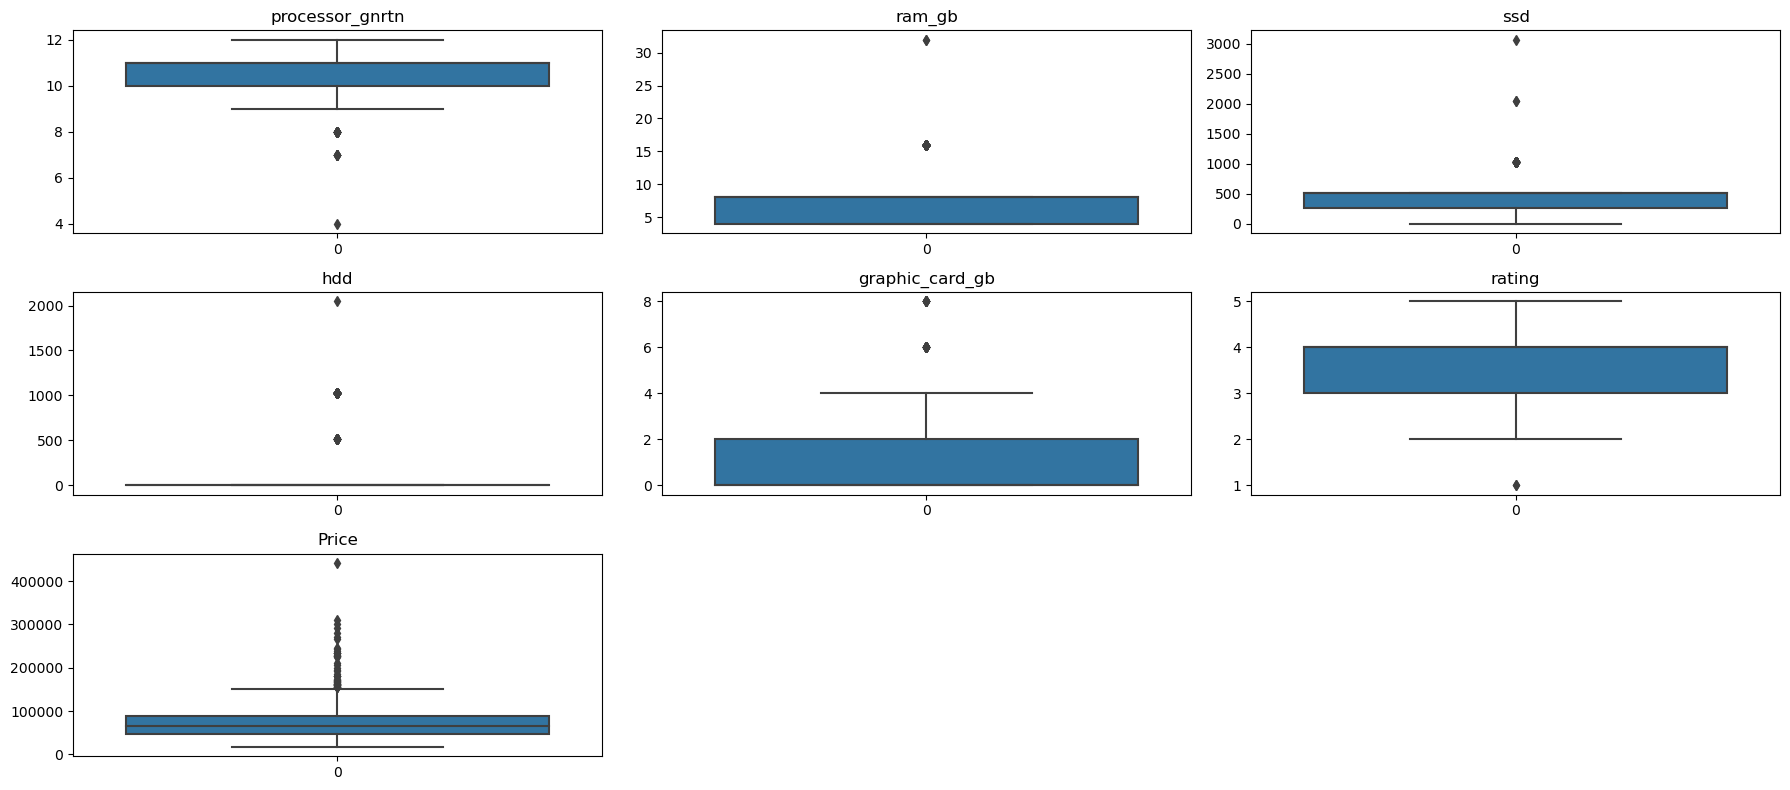

In [30]:
plt.figure(figsize=(18,8))

for i,var in enumerate(new_df[num_var]):
    plt.subplot(3,3,i+1)
    sns.boxplot(new_df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

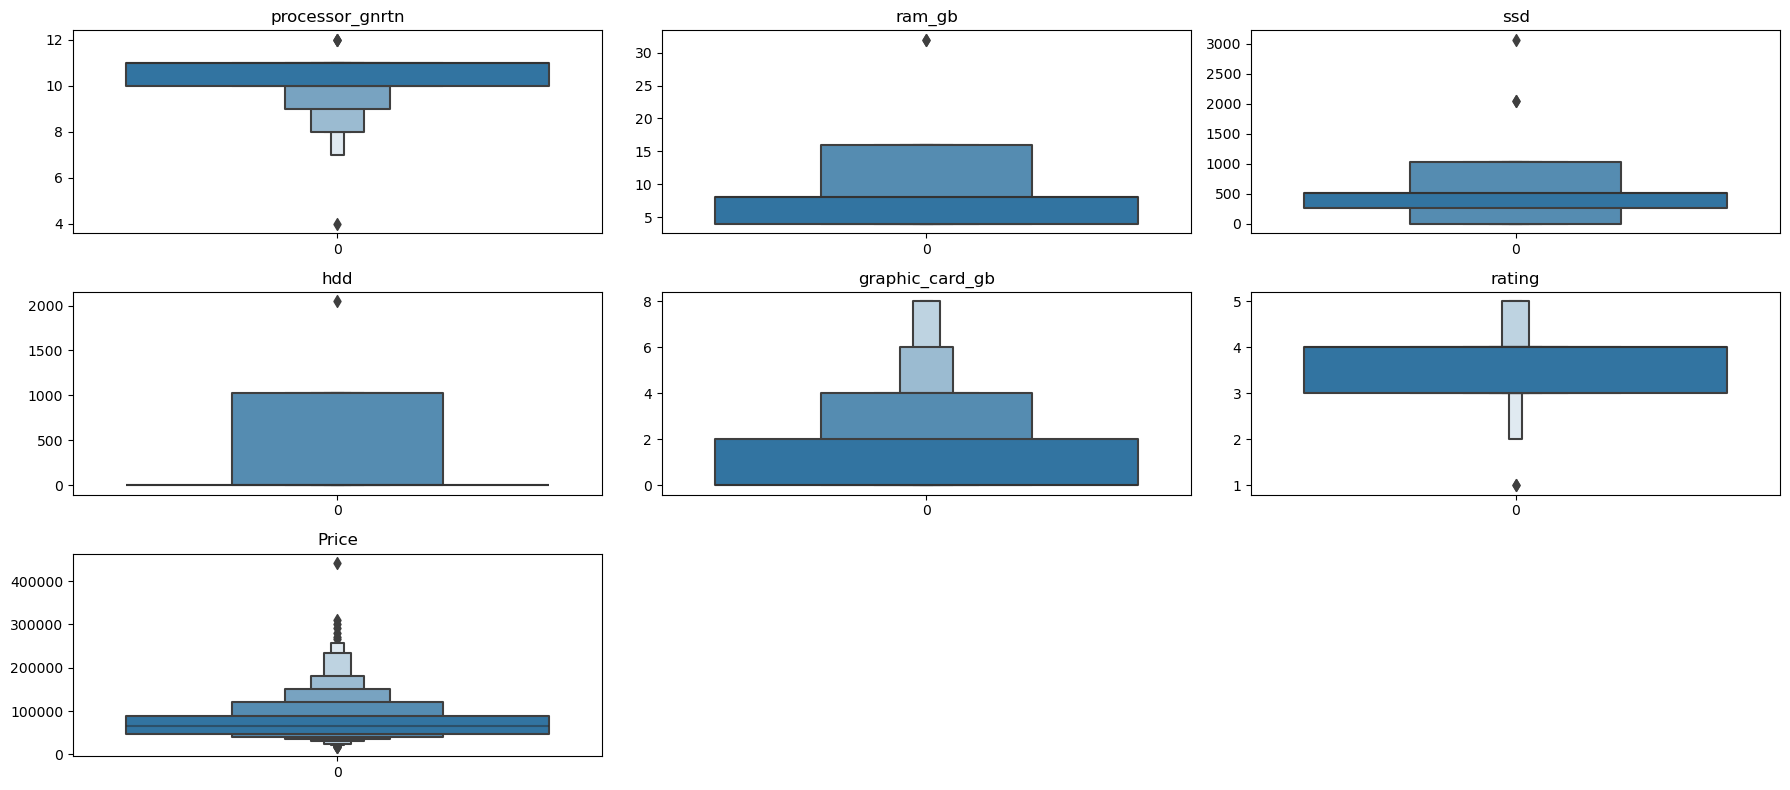

In [31]:
plt.figure(figsize=(18,8))

for i,var in enumerate(new_df[num_var]):
    plt.subplot(3,3,i+1)
    sns.boxenplot(new_df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

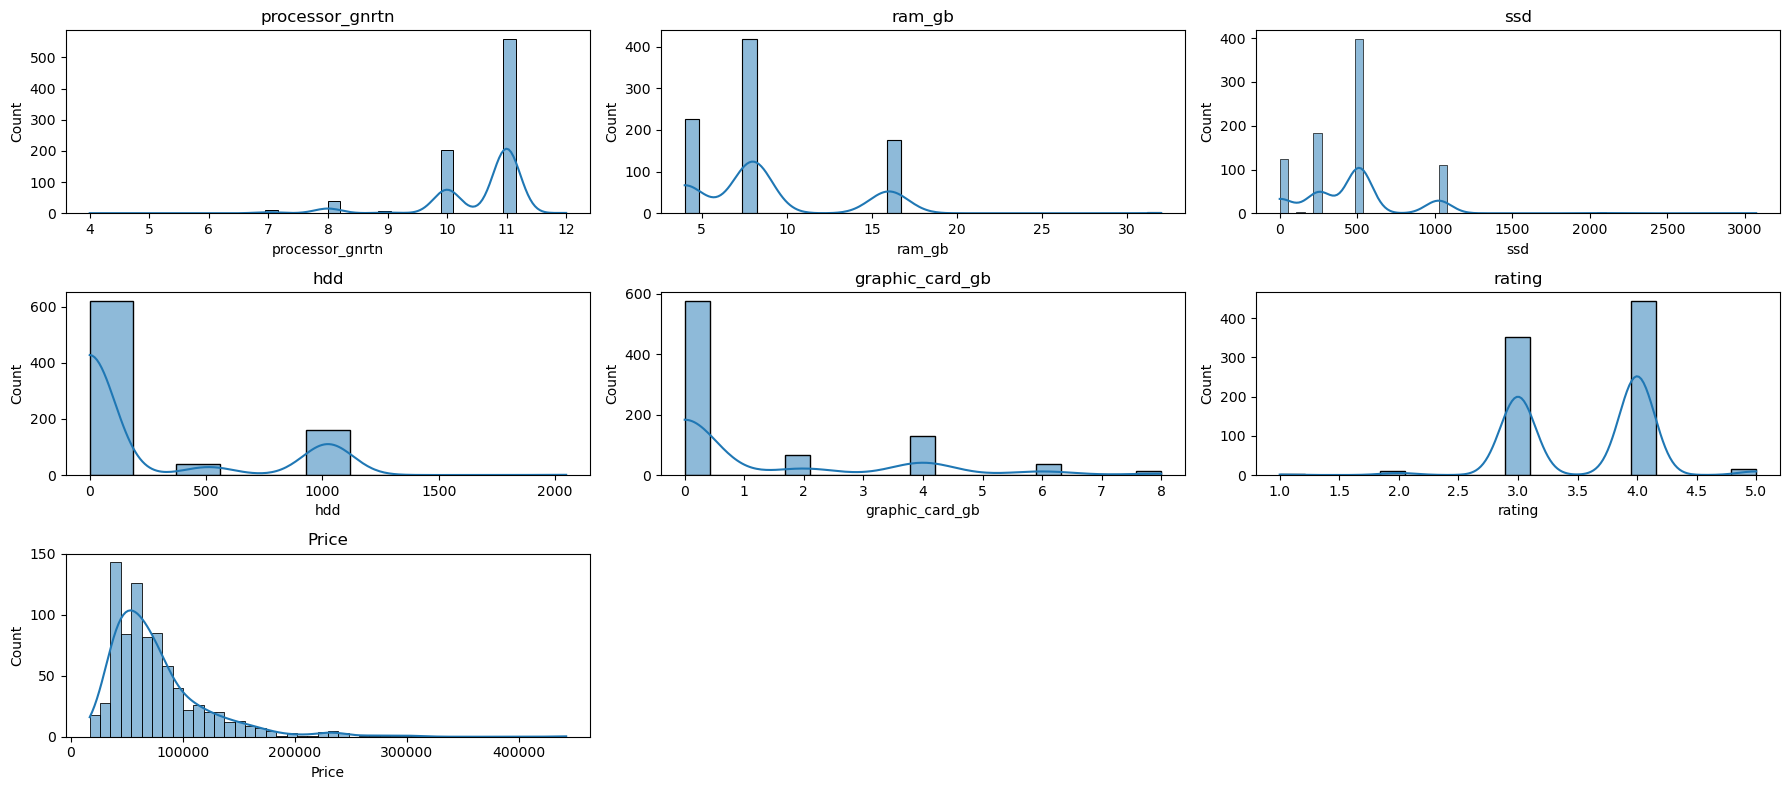

In [32]:
plt.figure(figsize=(18,8))

for i,var in enumerate(new_df[num_var]):
    plt.subplot(3,3,i+1)
    sns.histplot(new_df[var],kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

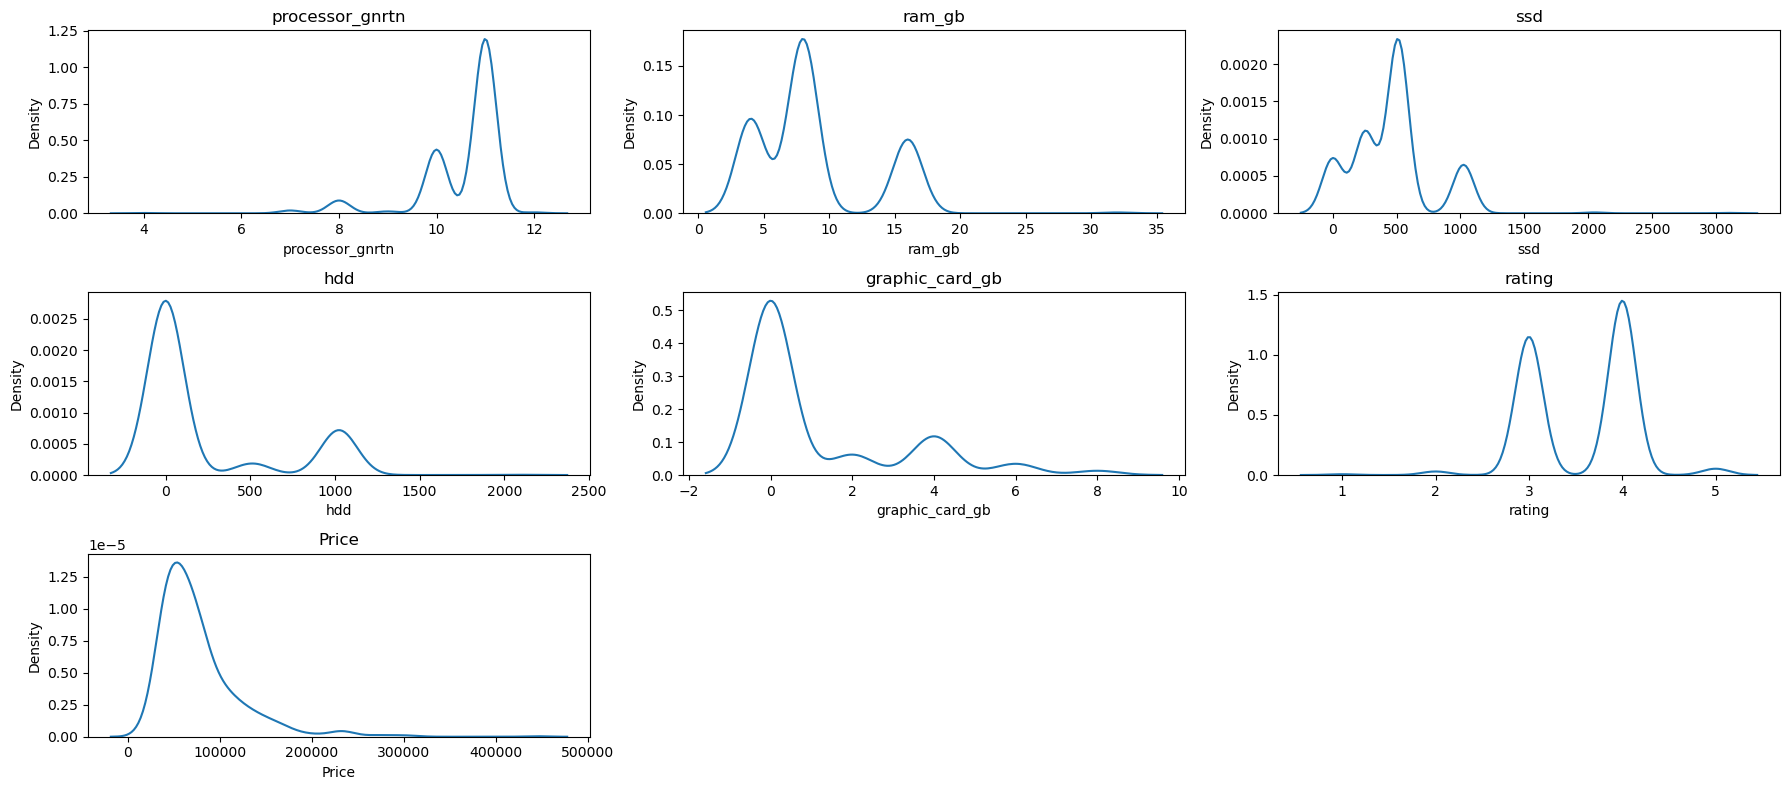

In [33]:
plt.figure(figsize=(18,8))

for i,var in enumerate(new_df[num_var]):
    plt.subplot(3,3,i+1)
    sns.kdeplot(new_df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Price')

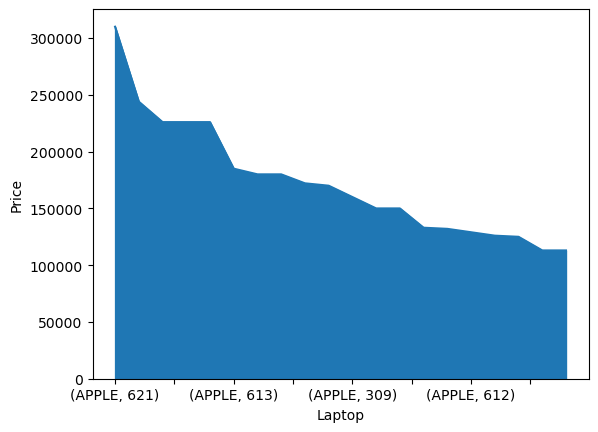

In [34]:
new_df.groupby('brand')['Price'].apply(lambda x: x.sort_values(ascending=False)).head(20).plot(kind='area')
plt.xlabel("Laptop")
plt.ylabel("Price")

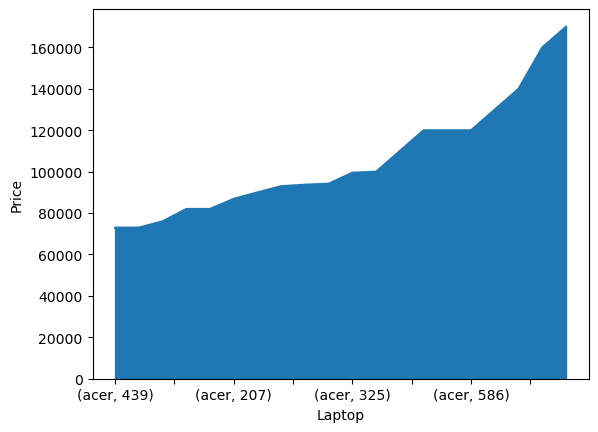

In [35]:
new_df.groupby('brand')['Price'].apply(lambda x: x.sort_values(ascending=True)).tail(20).plot(kind='area')
plt.xlabel("Laptop")
plt.ylabel("Price")
plt.show()

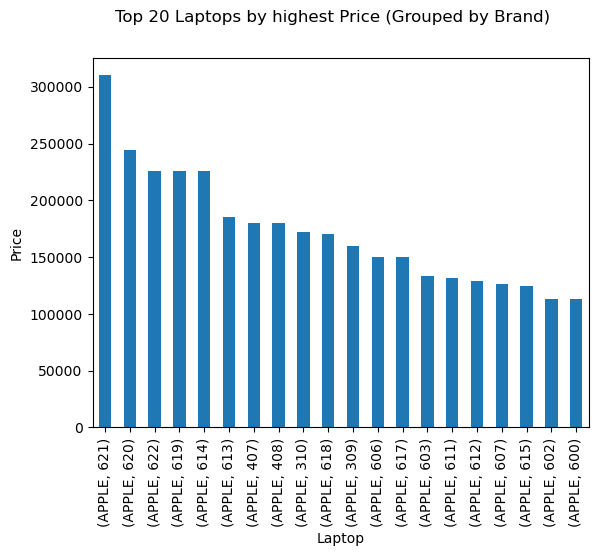

In [36]:
new_df.groupby('brand')['Price'].apply(lambda x: x.sort_values(ascending=False)).head(20).plot(kind='bar')
plt.xlabel("Laptop")
plt.ylabel("Price")
plt.suptitle("Top 20 Laptops by highest Price (Grouped by Brand)")
plt.show()

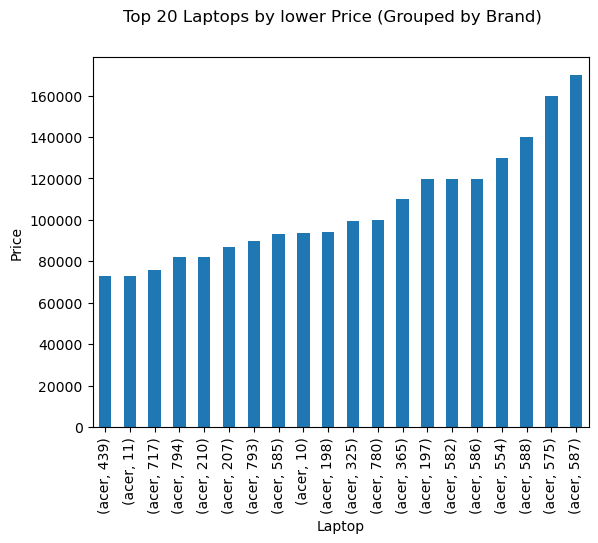

In [37]:
new_df.groupby('brand')['Price'].apply(lambda x: x.sort_values(ascending=True)).tail(20).plot(kind='bar')
plt.xlabel("Laptop")
plt.ylabel("Price")
plt.suptitle("Top 20 Laptops by lower Price (Grouped by Brand)")
plt.show()

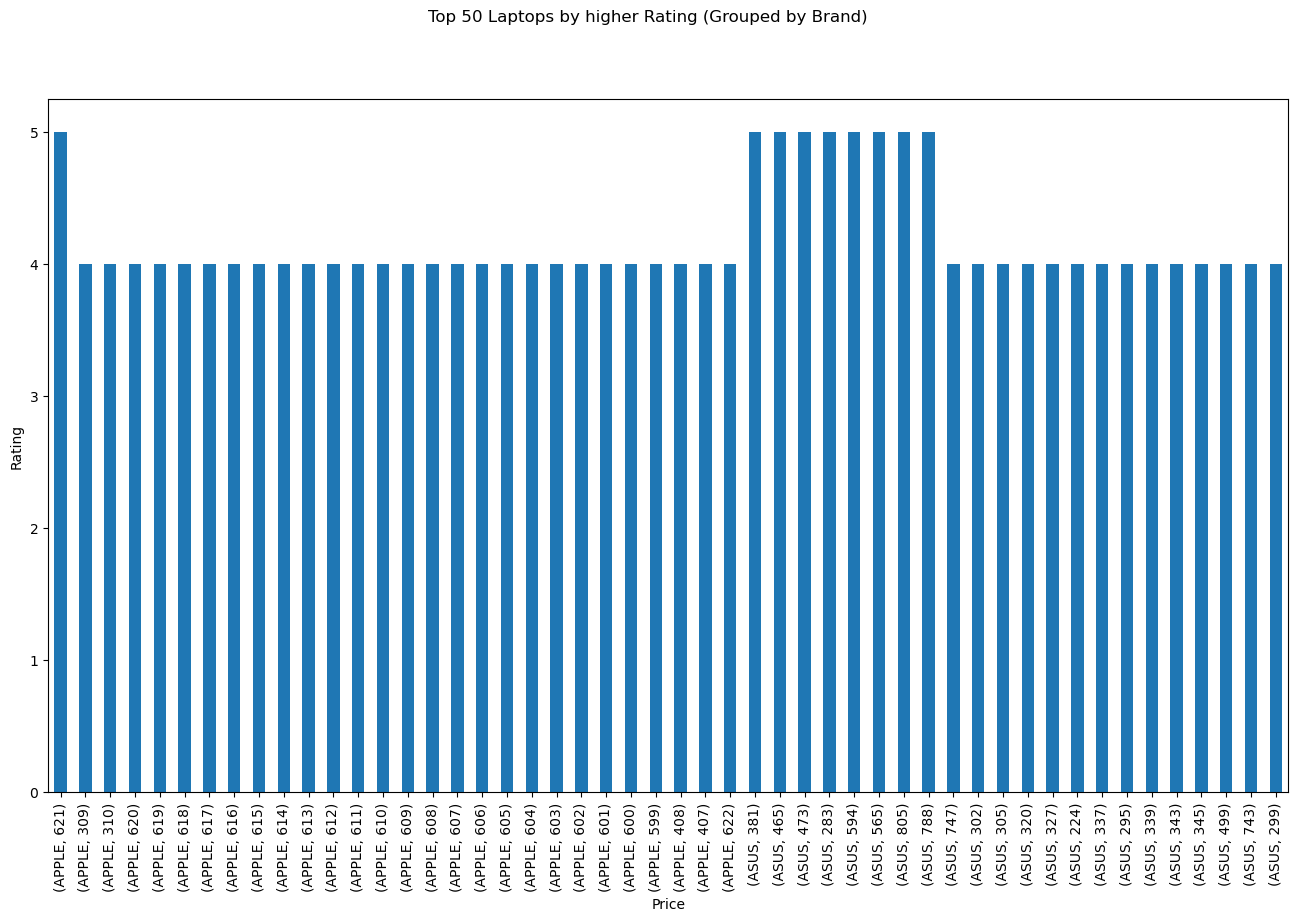

In [38]:
plt.figure(figsize=(16,9))
new_df.groupby('brand')['rating'].apply(lambda x: x.sort_values(ascending=False)).head(50).plot(kind='bar')
plt.ylabel("Rating")
plt.xlabel("Price")
plt.suptitle("Top 50 Laptops by higher Rating (Grouped by Brand)")
plt.show()

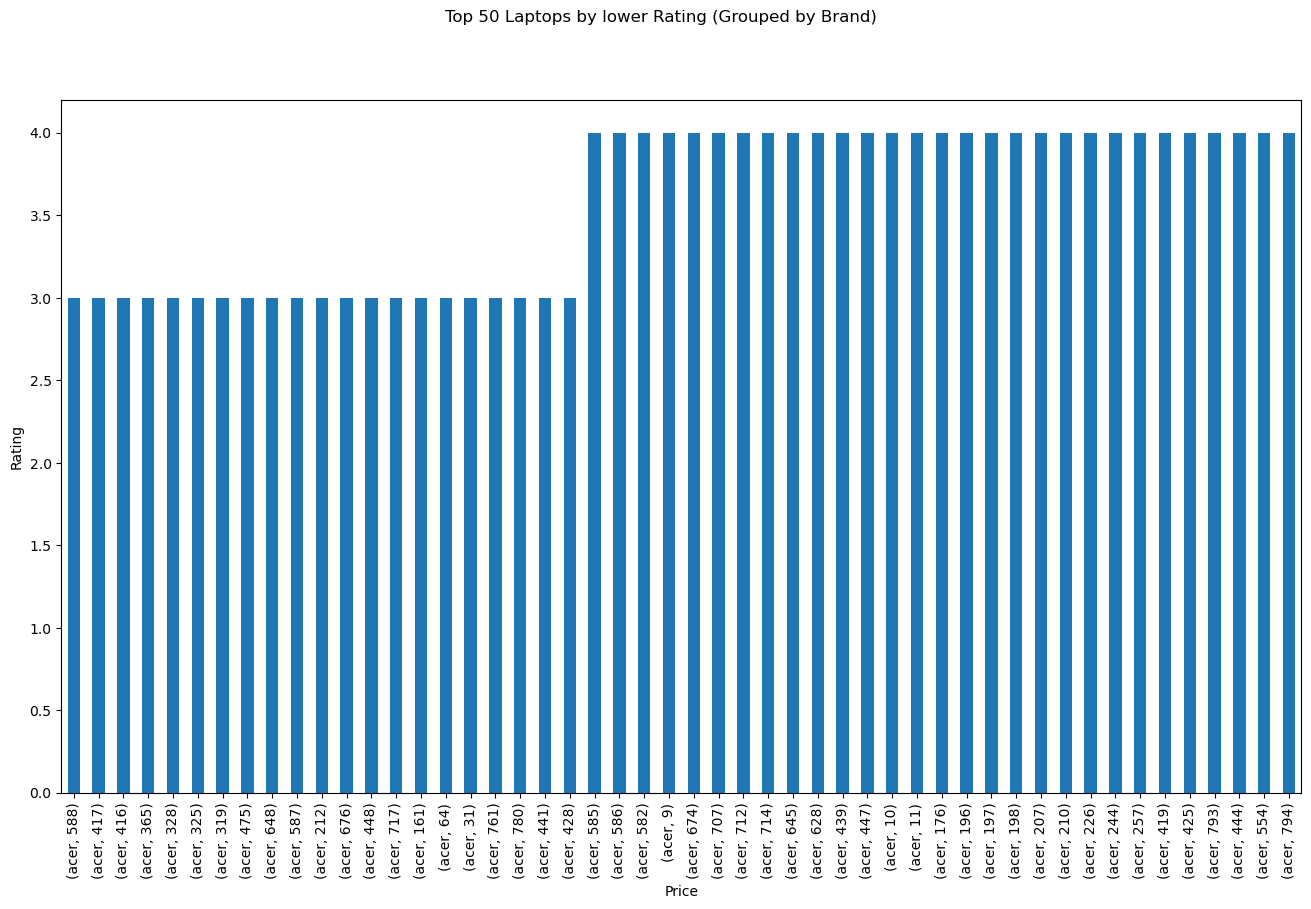

In [39]:
plt.figure(figsize=(16,9))
new_df.groupby('brand')['rating'].apply(lambda x: x.sort_values(ascending=True)).tail(50).plot(kind='bar')
plt.ylabel("Rating")
plt.xlabel("Price")
plt.suptitle("Top 50 Laptops by lower Rating (Grouped by Brand)")
plt.show()

**3. Data Spltting**

In [40]:
X=new_df.drop(columns='Price')
y=new_df['Price']

In [41]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**4. Feature Engineering with ColumnsTransformer**

In [43]:
X_train.head(2)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,Touchscreen,msoffice,rating
239,ASUS,Intel,Core i5,11,16,DDR4,512,0,Windows,0,No,No,3
707,acer,AMD,Ryzen 5,11,4,DDR4,512,0,Windows,0,No,No,4


In [44]:
tf1=ColumnTransformer(transformers=[
    ('ohn',OneHotEncoder(drop='first',sparse_output=False),[0,1,2,5,8,10,11]),
],remainder='passthrough')

tf2=ColumnTransformer(transformers=[
    ('sc',StandardScaler(),slice(0,None)),
],remainder='passthrough')

In [45]:
##import model from the sklearns 
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

**M-1 Linear Regressor**

In [46]:
lr=LinearRegression()

In [47]:
pipe_lr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lr',lr)
])

In [48]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('lr', LinearRegression())])

**Score on training data**

In [49]:
pipe_lr.score(X_train,y_train)

0.7843105846858487

In [50]:
y_pred_lr=pipe_lr.predict(X_test)

In [51]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_lr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_lr))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_lr))

Mean Squared Error (MSE): 634389197.9272133
Root Mean Squared Error (RMSE): 25187.083950453918
Mean Absolute Error (MAE): 15960.024603027037
R-squared (R2) Score: 0.6744730396277407


**Ridge Regressor**

In [52]:
rg=Ridge()

In [53]:
pipe_rg=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('rg',rg)
])

In [54]:
pipe_rg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('rg', Ridge())])

In [55]:
y_pred_rg=pipe_rg.predict(X_test)

In [56]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_rg))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_rg)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_rg))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_rg))

Mean Squared Error (MSE): 631221254.7723405
Root Mean Squared Error (RMSE): 25124.11699487846
Mean Absolute Error (MAE): 15929.738603290722
R-squared (R2) Score: 0.6760986204371356


In [57]:
# Define the hyperparameter grid for tuning alpha
param_grid = {'alpha': [0.1, 1, 10]}

In [58]:
# Perform grid search with cross-validation
gs_rg = GridSearchCV(rg, param_grid, cv=5)
pipe_gsrg=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gs_rd',gs_rg)
])
pipe_gsrg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gs_rd',
                 GridSearchCV(cv=5, estimator=Ridge(),
                              param_grid={'alpha': [0.1, 1, 10]}))])

In [59]:
# Get the best hyperparameters and model
best_params = gs_rg.best_params_
best_model = gs_rg.best_estimator_
best_score = gs_rg.best_score_
# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'alpha': 10}
Best Score: 0.7239110886256073


In [60]:
rg1=Ridge(**best_params)

In [61]:
pipe_rg1=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('rg1',rg1)
])

In [62]:
pipe_rg1.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('rg1', Ridge(alpha=10))])

In [63]:
y_pred_rg1=pipe_rg1.predict(X_test)

In [64]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_rg1))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_rg1)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_rg1))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_rg1))

Mean Squared Error (MSE): 625943816.6157767
Root Mean Squared Error (RMSE): 25018.869211372777
Mean Absolute Error (MAE): 15827.02605957655
R-squared (R2) Score: 0.6788066558312943


**Lasso Regressor**

In [65]:
ls=Lasso()

In [66]:
pipe_ls=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('ls',ls)
])

In [67]:
pipe_ls.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.843e+09, tolerance: 1.350e+08
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('ls', Lasso())])

In [68]:
y_pred_ls=pipe_ls.predict(X_test)

In [69]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_ls))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_ls)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_ls))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_ls))

Mean Squared Error (MSE): 631917971.3444003
Root Mean Squared Error (RMSE): 25137.978664650032
Mean Absolute Error (MAE): 15935.155034206497
R-squared (R2) Score: 0.6757411111531115


**ElasticNet Regressor**

In [70]:
elt=ElasticNet()

In [71]:
pipe_elt=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('elt',elt)
])

In [72]:
pipe_elt.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('elt', ElasticNet())])

In [73]:
y_pred_elt=pipe_elt.predict(X_test)

In [74]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_elt))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_elt)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_elt))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_elt))

Mean Squared Error (MSE): 651622128.4997997
Root Mean Squared Error (RMSE): 25526.890302185257
Mean Absolute Error (MAE): 15169.181055417112
R-squared (R2) Score: 0.6656302290535232


**M-2 SVR**

In [75]:
svr=SVR()

In [76]:
pipe_svr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svr',svr)
])

In [77]:
pipe_svr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svr', SVR())])

In [78]:
y_pred_svr=pipe_svr.predict(X_test)

In [79]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_svr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_svr))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_svr))

Mean Squared Error (MSE): 2106576187.4703696
Root Mean Squared Error (RMSE): 45897.45295188361
Mean Absolute Error (MAE): 29864.118478638655
R-squared (R2) Score: -0.08095684059628483


**Parameter Tuning**

In [80]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

In [81]:
# Perform grid search with cross-validation
gs_svr = GridSearchCV(svr, param_grid, cv=5)
pipe_gs_svr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gs_svr',gs_svr)
])
pipe_gs_svr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gs_svr',
                 GridSearchCV(cv=5, estimator=SVR(),
                              param_grid={'C': [0.1, 1, 10],
                                          'gamma': ['scale', 'auto'],
                                          'kernel': ['linear', 'poly',
                                                     'rbf']}))])

In [82]:
# Get the best hyperparameters and model
best_params = gs_svr.best_params_
best_model = gs_svr.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [83]:
svr1=SVR(**best_params)

In [84]:
pipe_svr1=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svr1',svr1)
])

In [85]:
pipe_svr1.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svr1', SVR(C=10, kernel='linear'))])

In [86]:
y_pred_svr1=pipe_svr1.predict(X_test)

In [87]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_svr1))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_svr1)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_svr1))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_svr1))

Mean Squared Error (MSE): 1384397683.6178617
Root Mean Squared Error (RMSE): 37207.49499251276
Mean Absolute Error (MAE): 21057.044045998337
R-squared (R2) Score: 0.28961783812367903


**M-3 Decision Tree Regressor**

In [88]:
dtr=DecisionTreeRegressor()

In [89]:
pipe_dtr=Pipeline([
    ('tf1',tf1),
    ('ft2',tf2),
    ('dtr',dtr)
])

In [90]:
pipe_dtr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('ft2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtr', DecisionTreeRegressor())])

**Score on Training Data**

In [91]:
pipe_dtr.score(X_train,y_train)

0.9735956260019262

In [92]:
y_pred_dtr=pipe_dtr.predict(X_test)

In [93]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_dtr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_dtr)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_dtr))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_dtr))

Mean Squared Error (MSE): 1036685050.1731464
Root Mean Squared Error (RMSE): 32197.593856888536
Mean Absolute Error (MAE): 15831.359494949493
R-squared (R2) Score: 0.46804117354320585


**Parameter Tuning**

In [94]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [95]:
# Perform grid search with cross-validation
gs_dtr = GridSearchCV(dtr, param_grid, cv=5)
pipe_gsdtr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gs_dtr',gs_dtr)
])
pipe_gsdtr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/si

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gs_dtr',
                 GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                              param_grid={'max_depth': [None, 5, 10],
                                          'max_features': ['auto', 'sqrt',
                                                           'log2'],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]}))])

In [96]:
# Get the best hyperparameters and model
best_params = gs_dtr.best_params_
best_model = gs_dtr.best_estimator_
best_score = gs_dtr.best_score_
# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best score:", best_score)

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.6649491933699432


In [97]:
dtr1=DecisionTreeRegressor(**best_params)

In [98]:
pipe_dtr1=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('dtr1',dtr1)
])

In [99]:
pipe_dtr1.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtr1',
                 DecisionTreeRegressor(max_features='log2', min_samples_leaf=2,
                                       min_samples_split=10))])

In [100]:
y_pred_dtr1=pipe_dtr1.predict(X_test)

In [101]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_dtr1))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_dtr1)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_dtr1))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_dtr1))

Mean Squared Error (MSE): 691214912.3977299
Root Mean Squared Error (RMSE): 26290.96636485106
Mean Absolute Error (MAE): 14282.38660649292
R-squared (R2) Score: 0.6453138071518254


**M-4 Random Forest Regressor**

In [102]:
rfr=RandomForestRegressor()

In [103]:
pipe_rr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('rfr',rfr)
])

In [104]:
pipe_rr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('rfr', RandomForestRegressor())])

In [105]:
y_pred_rr=pipe_rr.predict(X_test)

In [106]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_rr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_rr)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_rr))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_rr))

Mean Squared Error (MSE): 810595319.4713345
Root Mean Squared Error (RMSE): 28470.955717561264
Mean Absolute Error (MAE): 14240.13195343949
R-squared (R2) Score: 0.584055606082752


**M-5 XGBRegressor**

In [107]:
xgbr=XGBRegressor()

In [108]:
pipe_xgbr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgbr',xgbr)
])

In [109]:
pipe_xgbr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('xgbr',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=No...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [110]:
y_pred_xgbr=pipe_xgbr.predict(X_test)

In [111]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_xgbr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_xgbr))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_xgbr))

Mean Squared Error (MSE): 807105525.441054
Root Mean Squared Error (RMSE): 28409.60269769808
Mean Absolute Error (MAE): 13715.165696022726
R-squared (R2) Score: 0.5858463396682453


In [112]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


In [113]:
gs_xgbr= GridSearchCV(xgbr, param_grid, cv=5)

In [114]:
pipe_xgbr1=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgbr1',gs_xgbr)
])

In [115]:
pipe_xgbr1.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 2, 5, 8, 10, 11])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('xgbr1',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callba...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...),
                              param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                                          'learning_rate': [0.1, 0.01, 0.001],
                                          'max_depth': [3, 5, 7],
                                          'n_estimators': [100, 500, 1000],
                                          'subsample': [0.8, 0.9, 1.0]}))])

In [116]:
y_pred_xgbr1=pipe_xgbr1.predict(X_test)

In [117]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_xgbr1))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_xgbr1)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_xgbr1))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_xgbr1))

Mean Squared Error (MSE): 739754851.6779323
Root Mean Squared Error (RMSE): 27198.43472845326
Mean Absolute Error (MAE): 13285.142850378788
R-squared (R2) Score: 0.6204062914782196


**M-6 ANN With Regressor**

In [118]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [119]:
X_train_onh=tf1.fit_transform(X_train)
X_test_onh=tf1.transform(X_test)

In [120]:
X_train_scaled=tf2.fit_transform(X_train_onh)
X_test_scaled=tf2.transform(X_test_onh)

In [121]:
#Create the ANN model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(Dense(units=32, activation='relu'))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(Dense(units=16, activation='relu'))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))

model.add(Dense(units=8, activation='relu'))
# model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.05))
# Add output layer
model.add(Dense(units=1, activation='linear'))
# Compile the model
model.compile(optimizer='adam', loss=keras.losses.mean_absolute_error, metrics=['mae'])

# Train the model
history=model.fit(X_train_scaled, y_train, epochs=250,batch_size=50)

Epoch 1/250
14/14 [==============================] - 2s 3ms/step - loss: 76530.8984 - mae: 76530.8984
Epoch 2/250
14/14 [==============================] - 0s 2ms/step - loss: 76529.5234 - mae: 76529.5234
Epoch 3/250
14/14 [==============================] - 0s 2ms/step - loss: 76527.6562 - mae: 76527.6484
Epoch 4/250
14/14 [==============================] - 0s 2ms/step - loss: 76524.7422 - mae: 76524.7422
Epoch 5/250
14/14 [==============================] - 0s 2ms/step - loss: 76520.0938 - mae: 76520.0938
Epoch 6/250
14/14 [==============================] - 0s 3ms/step - loss: 76512.8281 - mae: 76512.8203
Epoch 7/250
14/14 [==============================] - 0s 2ms/step - loss: 76501.3828 - mae: 76501.3828
Epoch 8/250
14/14 [==============================] - 0s 2ms/step - loss: 76483.0625 - mae: 76483.0625
Epoch 9/250
14/14 [==============================] - 0s 2ms/step - loss: 76451.6016 - mae: 76451.6016
Epoch 10/250
14/14 [==============================] - 0s 2ms/step - loss: 76405.16

In [122]:
# Make predictions
y_pred_ann = model.predict(X_test_scaled)

6/6 [==============================] - 0s 2ms/step


In [123]:
r2_score(y_test,y_pred_ann)

0.6449545699144641

In [124]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test,y_pred_ann))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test,y_pred_ann)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test,y_pred_ann))
print("R-squared (R2) Score:", r2_score(y_test,y_pred_ann))

Mean Squared Error (MSE): 691914996.4172367
Root Mean Squared Error (RMSE): 26304.277150631544
Mean Absolute Error (MAE): 13598.161387310605
R-squared (R2) Score: 0.6449545699144641


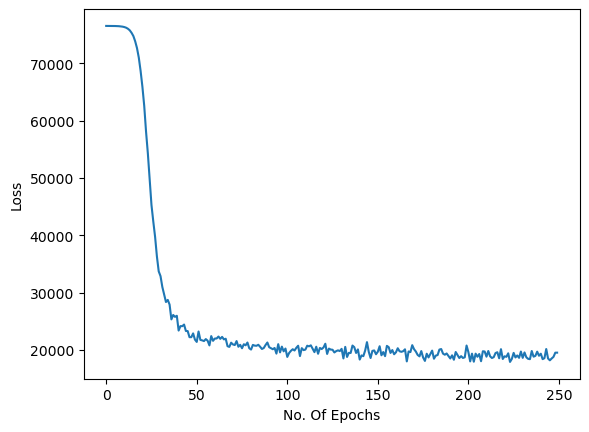

In [125]:
plt.plot(history.history['loss'])
plt.xlabel("No. Of Epochs")
plt.ylabel("Loss")
plt.show()

In [126]:
new_df.sample(2)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,Touchscreen,msoffice,rating,Price
745,ASUS,AMD,Ryzen 7,11,16,DDR4,512,0,Windows,0,No,No,3,79990
489,Lenovo,Intel,Core i7,11,16,DDR4,512,0,Windows,0,Yes,Yes,4,85990


In [127]:
##svr model prediction on sample data 
pipe_dtr.predict(pd.DataFrame([['MSI','Intel','Core i5',11,8,'DDR4',512,0,'Windows',0,'No','No',4]],columns=['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','graphic_card_gb','Touchscreen','msoffice','rating']))

array([55490.])

In [128]:
##dtr model prediction on sample data
pipe_dtr.predict(pd.DataFrame([['HP','AMD','Ryzen 5',11,8,'DDR4',512,0,'Windows',0,'No','No',4]],columns=['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','graphic_card_gb','Touchscreen','msoffice','rating']))

array([48990.])

In [129]:
##elt model prediction on sample data 
pipe_dtr.predict(pd.DataFrame([['acer','AMD','Ryzen 3',11,4,'DDR4',512,0,'Windows',0,'No','No',3]],columns=['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','graphic_card_gb','Touchscreen','msoffice','rating']))

array([34990.])

In [130]:
##lasso prediction on sample data
pipe_ls.predict(pd.DataFrame([['DELL','Intel','Core i3',11,8,'DDR4',0,1024,'Windows',0,'No','No',3]],columns=['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','graphic_card_gb','Touchscreen','msoffice','rating']))

array([39417.5386069])

In [131]:
##linear model prediction on sample data 
pipe_dtr.predict(pd.DataFrame([['Lenovo','Intel','Core i5',11,16,'DDR4',512,0,'Windows',2,'No','Yes',4]],columns=['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','graphic_card_gb','Touchscreen','msoffice','rating']))

array([70990.])

In [132]:
d={
    'Model Name':['Liner Regression','Ridge Regression','Lasso Regression','ElasticNet Regression','Support Vector Regression','Decision Tree Regression','Random Forest Regression','XGBRegressor','DNN'],
    'Score':[r2_score(y_test,y_pred_lr), r2_score(y_test,y_pred_rg),r2_score(y_test,y_pred_ls),r2_score(y_test,y_pred_elt),r2_score(y_test,y_pred_svr1),r2_score(y_test,y_pred_dtr),r2_score(y_test,y_pred_rr),r2_score(y_test,y_pred_xgbr),r2_score(y_test,y_pred_ann)]
}

In [133]:
pd.DataFrame(d)

,Model Name,Score
0,Liner Regression,0.674473
1,Ridge Regression,0.676099
2,Lasso Regression,0.675741
3,ElasticNet Regression,0.665630
4,Support Vector Regression,0.289618
5,Decision Tree Regression,0.468041
6,Random Forest Regression,0.584056
7,XGBRegressor,0.585846
8,DNN,0.644955


#### Now , We will dump our ideal model , from these all model our ideal model **Decision Tree Regression** 

In [134]:
import pickle as pkl

In [135]:
pkl.dump(pipe_dtr,open('DTR_Model.pkl','wb'))

In [136]:
model=pkl.load(open('DTR_Model.pkl','rb'))

In [137]:
##linear model prediction on sample data 
model.predict(pd.DataFrame([['Lenovo','Intel','Core i5',11,16,'DDR4',512,0,'Windows',2,'No','Yes',4]],columns=['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ram_type','ssd','hdd','os','graphic_card_gb','Touchscreen','msoffice','rating']))

array([70990.])